<a href="https://colab.research.google.com/github/jpatrickweller/Data_Challenges/blob/main/Clairvoyant_Constructor_JPW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Jiminey Crickets!! Its time for series... TIMESERIES!!

In [ ]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving construction_material_prices_2008_2018.csv to construction_material_prices_2008_2018 (1).csv
User uploaded file "construction_material_prices_2008_2018.csv" with length 116986 bytes


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Load the usual suspects

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp

# A few pandas parameters to adjust here...
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'


# And finally load the data
df = pd.read_csv('construction_material_prices_2008_2018.csv')

In [4]:
df.head()

,Unnamed: 0,price_steel,price_rebar,price_glass,price_concrete,price_plywood
0,2007-01-01,NaN,NaN,NaN,NaN,NaN
1,2007-01-03,NaN,NaN,NaN,NaN,NaN
2,2007-01-04,NaN,NaN,NaN,NaN,NaN
3,2007-01-05,NaN,NaN,NaN,NaN,NaN
4,2007-01-08,NaN,NaN,NaN,NaN,NaN


In [5]:
profile = pp.ProfileReport(df, title="Clairvoyant Constructor", html={'style':{'full_width': True}})

In [6]:
profile

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
df.set_index('Unnamed: 0', inplace=True)
df.index.name = 'Date'


,price_steel,price_rebar,price_glass,price_concrete,price_plywood
Date,,,,,
2007-01-01,NaN,NaN,NaN,NaN,NaN
2007-01-03,NaN,NaN,NaN,NaN,NaN
2007-01-04,NaN,NaN,NaN,NaN,NaN
2007-01-05,NaN,NaN,NaN,NaN,NaN
2007-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-06-13,NaN,NaN,NaN,NaN,NaN
2018-06-14,NaN,NaN,NaN,NaN,NaN
2018-06-15,NaN,NaN,NaN,NaN,NaN


In [112]:
df.index = pd.to_datetime(df.index).floor('D')
print(df.index.dtype)
display(df.head())

datetime64[ns]


,price_steel,price_rebar,price_glass,price_concrete,price_plywood
Date,,,,,
2007-01-01,NaN,NaN,NaN,NaN,NaN
2007-01-03,NaN,NaN,NaN,NaN,NaN
2007-01-04,NaN,NaN,NaN,NaN,NaN
2007-01-05,NaN,NaN,NaN,NaN,NaN
2007-01-08,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


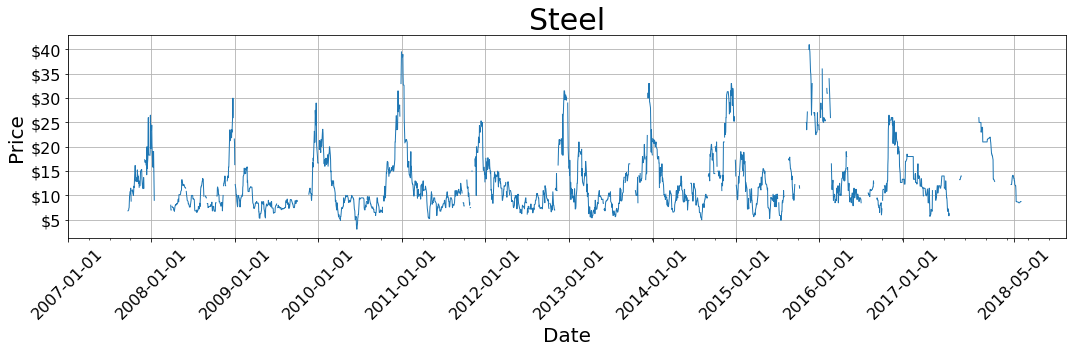

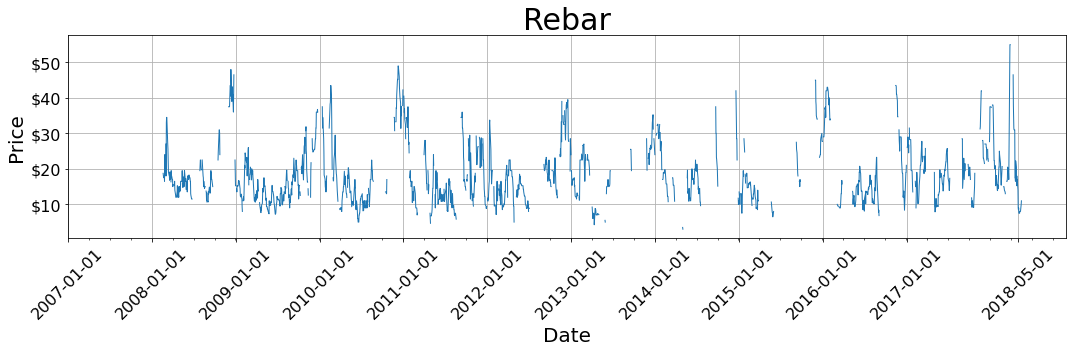

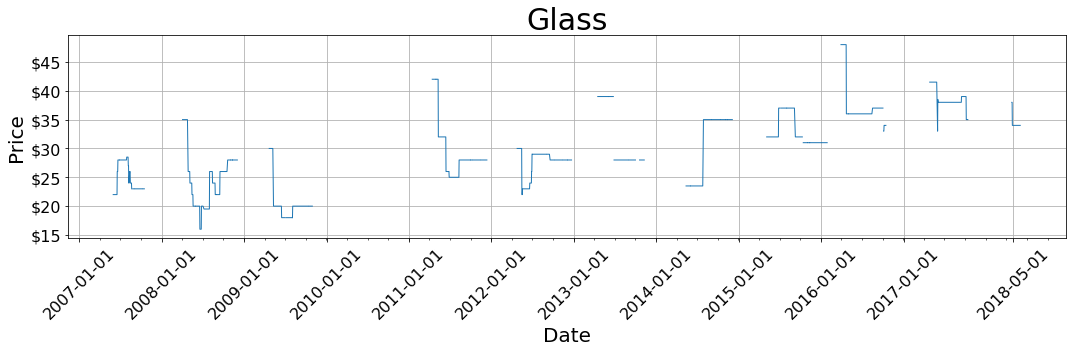

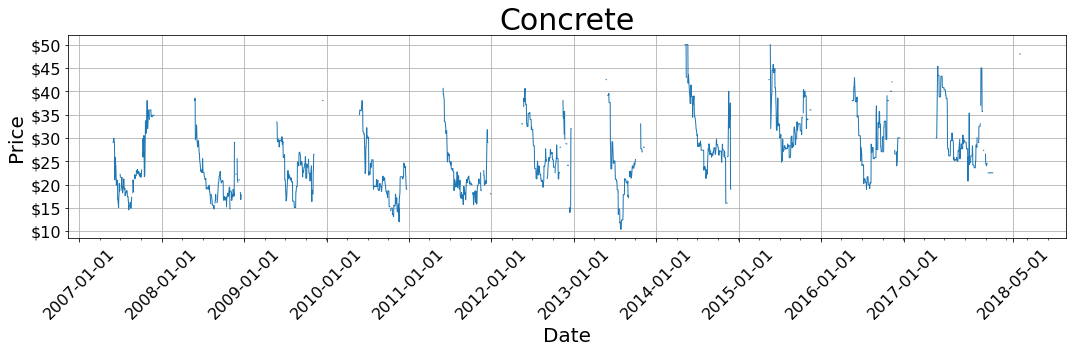

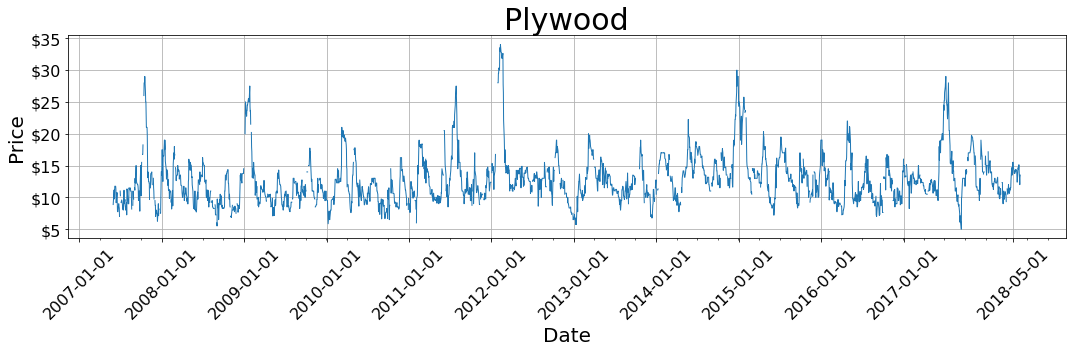

In [155]:
# Lets see those timeseries!
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

# Some (shared) x-axis axis stuff
ax_dates = df.index[df.index.is_month_start][::12]
minor_ax = df.index[df.index.is_month_start][::3]

for comod in df:

    # make a figure
    plt.figure(figsize=(15,5))
    
    # pull out each commodity
    comod_name = comod.split("_")[1].capitalize()
    plt.plot(df[comod], label=comod_name, linewidth=1)
    plt.title(comod_name, size=30)
    plt.grid(which='major')   

    # X axis stuff
    plt.xlabel('Date', size=20)
    plt.xticks(ax_dates, labels=ax_dates, size=16, rotation=45)
    plt.axes().xaxis.set_minor_locator(AutoMinorLocator(4))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

    # Y axis stuff
    plt.ylabel('Price', size=20)
    plt.yticks(size=16)
    plt.axes().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 

    # spacing for labels
    plt.tight_layout()
    plt.show()


In [61]:

df.index[df.index.is_month_start]

DatetimeIndex(['2007-01-01', '2007-02-01', '2007-03-01', '2007-04-01',
               '2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01',
               '2007-09-01', '2007-10-01',
               ...
               '2017-05-01', '2017-06-01', '2017-08-01', '2017-09-01',
               '2017-11-01', '2017-12-01', '2018-02-01', '2018-03-01',
               '2018-05-01', '2018-06-01'],
              dtype='datetime64[ns]', name='Date', length=134, freq=None)

In [144]:
c

'price_steel'